<a href="https://colab.research.google.com/github/mskreddy15/Machine-learning-and-Deep-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted values  [121279.44  89061.72  74258.99]
Real values       [121872  91738  66029]
Trained W         8707.49
Trained b         29850.79


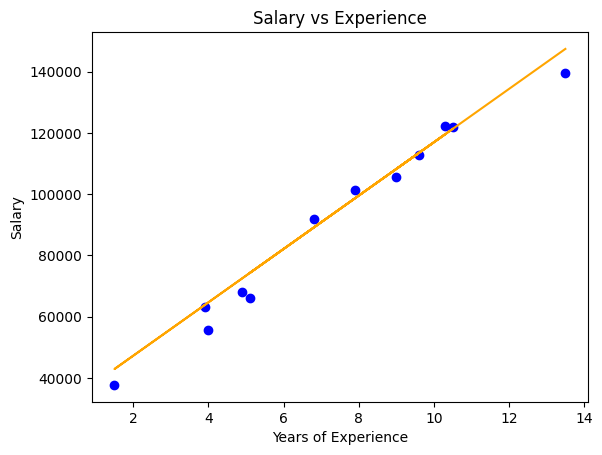

In [8]:
# Importing libraries

import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Linear Regression

class LinearRegression() :

    def __init__( self, learning_rate, iterations ) :

        self.learning_rate = learning_rate

        self.iterations = iterations

    # Function for model training

    def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features

        self.m, self.n = X.shape

        # weight initialization

        self.W = np.zeros( self.n )

        self.b = 0

        self.X = X

        self.Y = Y


        # gradient descent learning

        for i in range( self.iterations ) :

            self.update_weights()

        return self

    # Helper function to update weights in gradient descent

    def update_weights( self ) :

        Y_pred = self.predict( self.X )

        # calculate gradients

        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m

        db = - 2 * np.sum( self.Y - Y_pred ) / self.m

        # update weights

        self.W = self.W - self.learning_rate * dW

        self.b = self.b - self.learning_rate * db

        return self

    # Hypothetical function  h( x )

    def predict( self, X ) :

        return X.dot( self.W ) + self.b


# driver code

def main() :

    # Importing dataset

    df = pd.read_csv( "/content/Salary.csv" )

    X = df.iloc[:,:-1].values

    Y = df.iloc[:,1].values

    # Splitting dataset into train and test set

    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 1/3, random_state = 0 )

    # Model training

    model = LinearRegression( iterations = 1000, learning_rate = 0.01 )

    model.fit( X_train, Y_train )

    # Prediction on test set

    Y_pred = model.predict( X_test )

    print( "Predicted values ", np.round( Y_pred[:3], 2 ) )

    print( "Real values      ", Y_test[:3] )

    print( "Trained W        ", round( model.W[0], 2 ) )

    print( "Trained b        ", round( model.b, 2 ) )

    # Visualization on test set

    plt.scatter( X_test, Y_test, color = 'blue' )

    plt.plot( X_test, Y_pred, color = 'orange' )

    plt.title( 'Salary vs Experience' )

    plt.xlabel( 'Years of Experience' )

    plt.ylabel( 'Salary' )

    plt.show()

if __name__ == "__main__" :

    main()